# 1 Supervised learning 

## 1.1 Import the monthly and annual data and join

### import data files and create tables

In [1]:
# import packages needed
import pandas as pd
import numpy as np

In [2]:
# import data
Retail_Data_Response = pd.read_csv("Retail_Data_Response.csv")
# annual feature data
annual_features = pd.read_excel("annual_features.xlsx")
annual_day_of_week_counts_pivot = pd.read_excel("annual_day_of_week_counts_pivot.xlsx")
# monthly feature data
mth_rolling_features = pd.read_excel("mth_rolling_features.xlsx")
mth_day_counts = pd.read_excel("mth_day_counts.xlsx")
days_since_last_txn = pd.read_excel("days_since_last_txn.xlsx")

In [3]:
# drop the extra un-needed "Unnamed: 0" column from the monthly data
days_since_last_txn = days_since_last_txn.drop(columns = ["Unnamed: 0"])
mth_day_counts = mth_day_counts.drop(columns = ["Unnamed: 0"])
mth_rolling_features = mth_rolling_features.drop(columns = ["Unnamed: 0"])

Drop the extra columns generated form exporting monthly feature tables from assignment 3.

In [4]:
# check the number of rows and columns for each table
print(Retail_Data_Response.shape)
print(annual_features.shape)
print(annual_day_of_week_counts_pivot.shape)
print(mth_rolling_features.shape)
print(mth_day_counts.shape)
print(days_since_last_txn.shape)

(6884, 2)
(6889, 41)
(6889, 36)
(323783, 22)
(323783, 9)
(323783, 3)


By checking the number of rows and columns for each table. It was identified that Retail_Data_Response has fewer client data short compared to the features generated.

### monthly features outputs

Left join the monthly feature tables and client response together.

Fill the missing values in rolling features by back fill.

Drop the columns client number and date, since it wont be used for the classification.

Drop the rows without client response. 

In [5]:
# join the monthly feature together
monthly_features_outputs = mth_rolling_features.merge(mth_day_counts, how = "left",left_on = ["CLNT_NO", "ME_DT"], right_on = ["CLNT_NO", "ME_DT"])
monthly_features_outputs = monthly_features_outputs.merge(days_since_last_txn, how = "left",left_on = ["CLNT_NO", "ME_DT"], right_on = ["CLNT_NO", "ME_DT"])
# join the client response to the features
monthly_features_outputs = monthly_features_outputs.merge(Retail_Data_Response, how = "left",left_on = ["CLNT_NO"], right_on = ["customer_id"])
# fill missing data for rolling features by back fill
monthly_features_outputs = monthly_features_outputs.groupby("CLNT_NO").apply(lambda x: x.bfill())
# drop the client number and date, since it won't be used for the classification process.
monthly_features_outputs = monthly_features_outputs.drop(columns = ["CLNT_NO","ME_DT","customer_id"])
# drop data without customer response
monthly_features_outputs = monthly_features_outputs.dropna()
monthly_features_outputs

,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,212.0,35.333333,96.0,3.0,0.500000,1.0,268.0,22.333333,96.0,4.0,0.333333,1.0,0,0,0,0,0,0,0,51,0.0
1,56,1,56.0,18.666667,56.0,1.0,0.333333,1.0,212.0,35.333333,96.0,3.0,0.500000,1.0,268.0,22.333333,96.0,4.0,0.333333,1.0,0,0,0,0,0,0,1,15,0.0
2,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,212.0,35.333333,96.0,3.0,0.500000,1.0,268.0,22.333333,96.0,4.0,0.333333,1.0,0,0,0,0,0,0,0,46,0.0
3,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,212.0,35.333333,96.0,3.0,0.500000,1.0,268.0,22.333333,96.0,4.0,0.333333,1.0,1,0,0,0,0,0,0,12,0.0
4,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,212.0,35.333333,96.0,3.0,0.500000,1.0,268.0,22.333333,96.0,4.0,0.333333,1.0,0,0,0,0,0,0,0,42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,0,0,0,0,0,0,0,98,0.0
323779,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0,0,0,0,0,0,0,0,129,0.0
323780,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0,0,0,0,0,0,0,0,160,0.0
323781,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0,0,0,1,0,0,0,0,0,0.0


### annual features outputs

Left join the annual feature tables and client response together.

Drop the columns client number, since it wont be used for the classification.

Drop the rows without client response. 

In [6]:
# join the annual feature together
annual_features_outputs = annual_features.merge(annual_day_of_week_counts_pivot, how = "left",left_on = ["customer_id"], right_on = ["customer_id"])
# join the client response to the features
annual_features_outputs = annual_features_outputs.merge(Retail_Data_Response, how = "left",left_on = ["customer_id"], right_on = ["customer_id"])
# drop the client number, since it won't be used for the classification process.
annual_features_outputs = annual_features_outputs.drop(columns = ["customer_id"])
# drop data without customer response
annual_features_outputs = annual_features_outputs.dropna()
annual_features_outputs

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,39,56,52,36,59,39,12.719189,5.688585,19.919282,9.735388,0.000000,22.030282,12.720063,34.501208,16.862186,0.000000,212,337,212,212,39,485.333333,161.800000,1190.333333,284.333333,0.000000,3,5,3,3,1,1,0,0,1,0,0,1,0,0,1,3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0.0
1,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,98,57,51,65,36,44,12.170091,7.618399,5.851496,13.979151,15.762121,21.079216,17.035258,13.084342,27.958302,27.300794,244,374,426,226,220,444.333333,290.200000,171.200000,781.666667,745.333333,3,5,5,4,3,1,1,0,1,0,0,0,2,1,0,0,0,1,1,0,1,1,0,0,2,1,0,0,1,0,0,3,0,0,2,0,0,0,0,1,0.0
2,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,79,76,53,43,37,79,4.352011,22.000000,11.129241,11.001263,0.000000,9.731393,31.112698,24.885739,26.947480,0.000000,426,150,352,425,79,94.700000,968.000000,619.300000,726.166667,0.000000,5,2,5,6,1,0,1,0,1,1,0,2,0,0,1,1,0,0,0,0,1,0,1,2,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1.0
3,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,55,72,41,66,50,55,8.660254,8.257341,3.981249,11.316470,0.000000,15.000000,21.846870,10.533394,22.632941,0.000000,261,473,557,313,55,225.000000,477.285714,110.952381,512.250000,0.000000,3,7,7,4,1,0,0,1,1,0,0,1,1,1,0,2,1,1,1,0,1,2,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,1,0,0,1.0
4,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,0,41,45,59,40,0,10.601690,17.400511,0.000000,11.285389,0.000000,21.203380,30.138569,0.000000,25.234896,0.000000,235,230,59,333,0,449.583333,908.333333,0.000000,636.800000,0.000000,4,3,1,5,0,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,79,0,24,29,33,30,0,7.000000,2.603417,8.500000,8.959167,0.000000,9.899495,4.509250,12.020815,21.945387,0.000000,62,101,83,336,0,98.000000,20.333333,144.500000,481.600000,0.000000,2,3,2,6,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,1,1,2,0,0,0,0,0,0,0,0.0
6885,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,45,0,43,33,21,39,0,2.000000,3.378856,8.576777,3.000000,0.000000,2.828427,6.757712,21.008728,4.242641,0.000000,90,158,211,84,0,8.000000,45.666667,441.366667,18.000000,0.000000,2,4,6,2,0,0,0,0,0,1,0,1,1,2

## 1.2 Steps for each method

### 1.2.1 Separate the inputs X and the output y in two data frames

In [7]:
# generate the input and output table for both the monthly features and annual features
monthly_features_outputs_X = monthly_features_outputs.drop(columns = ["response"])
monthly_features_outputs_y = monthly_features_outputs["response"]
annual_features_outputs_X = annual_features_outputs.drop(columns = ["response"])
annual_features_outputs_y = annual_features_outputs["response"]

Check the tables

In [8]:
print(monthly_features_outputs_X.shape)
print(monthly_features_outputs_y.shape)
print(annual_features_outputs_X.shape)
print(annual_features_outputs_y.shape)

(323548, 28)
(323548,)
(6884, 75)
(6884,)


### 1.2.2 Split the data in train and test set.

Use a test size value of 2/3 and set the random state equal to 1147 for consistency.

In [9]:
from sklearn.model_selection import train_test_split
# Split the data in to train and test for both the annual features and monthly features.
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(monthly_features_outputs_X, monthly_features_outputs_y, test_size=2/3, random_state=1147)
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(annual_features_outputs_X, annual_features_outputs_y, test_size=2/3, random_state=1147)

### 1.2.3 Pre-process (if necessary for the method)

In [10]:
# create scaled features for the methods that need it.
from sklearn.preprocessing import StandardScaler
# Create the instance of the scaler
scaler_monthly = StandardScaler()
# Transform the inputs X train monthly
X_train_monthly_scaled = scaler_monthly.fit_transform(X_train_monthly)
# Transform the inputs X test monthly
X_test_monthly_scaled = scaler_monthly.transform(X_test_monthly)

# Create the instance of the scaler
scaler_annual = StandardScaler()
# Transform the inputs X train annual
X_train_annual_scaled = scaler_annual.fit_transform(X_train_annual)
# Transform the inputs X test annual
X_test_annual_scaled = scaler_annual.transform(X_test_annual)

### 1.2.4 Fit the training dataset and optimize the hyperparameters of the method.

A function is defined that takes in a machine learning model, parameters to evaluate, a score metric, X train, and y train. 

GridSearchCV from Sklearn is used. GridSearchCV takes in a machine learning model to fit the train data, a list of parameters with its corresponding values to try, and a score function to evaluate the performance of the model.

**GridSearchCV default: 5-fold cross validation.**

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
# create a function to train and hypertune the model provided.
def hyperparameter_tunning(ml_model, param_grid, scoring_function, X_train, y_train):
  # create grid search object with the model, parameters, and a score metric
  clf = GridSearchCV(ml_model, param_grid, n_jobs = -1, scoring = scoring_function) 
  # fits the model with X_train and y_train, and hypertunes the model
  clf.fit(X_train, y_train)
  # return the best performing model based on the score metric provided
  return clf.best_estimator_

In [13]:
# set the scoring metric
scoring_function = 'recall'

**All models generated used balanced class weights, because the response data is heavily skewed**

#### Logistic Regression Model

C: float, default=1.0
Inverse of regularization strength; must be a positive float.

penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

class_weight: dict or ‘balanced’, default=None
Weights associated with classes in the form {class_label: weight}. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

**Logistic Regression uses scaled feature data.**

In [14]:
# model parameters to evaluate
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# define the model
LR_model = LogisticRegression(penalty = 'l1', solver = 'saga', class_weight = 'balanced')

# tune the hyperparameters for each model
LR_monthly = hyperparameter_tunning(LR_model, param_grid, scoring_function, X_train_monthly_scaled, y_train_monthly)
LR_annual = hyperparameter_tunning(LR_model, param_grid, scoring_function, X_train_annual_scaled, y_train_annual)
# print the optimal model generated
print("Logistic Regression Monthly Feature Model")
print(LR_monthly)
print("")
print("Logistic Regression Annual Feature Model")
print(LR_annual)
print("")

Logistic Regression Monthly Feature Model
LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Annual Feature Model
LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)



#### Decision Tree Model

max_depth: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

max_leaf_nodes: int, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:
*   If int, then consider min_samples_split as the minimum number.
*   If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


In [15]:
# model parameters to evaluate
param_grid = {'max_depth':['None', 2, 6, 10, 14, 18, 22],
              'max_leaf_nodes':['None', 3, 25, 50, 100, 200],
              'min_samples_split':[2, 50, 100, 200, 400]}
# define the model
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state=0, class_weight = 'balanced')
# tune the hyperparameters for each model
DT_monthly = hyperparameter_tunning(DT_model, param_grid, scoring_function, X_train_monthly, y_train_monthly)
DT_annual = hyperparameter_tunning(DT_model, param_grid, scoring_function, X_train_annual, y_train_annual)
# print the optimal model generated
print("Decision Tree Monthly Feature Model")
print(DT_monthly)
print("")
print("Decision Tree Annual Feature Model")
print(DT_annual)
print("")

Decision Tree Monthly Feature Model
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=18, max_features=None,
                       max_leaf_nodes=100, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

Decision Tree Annual Feature Model
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features=None,
                       max_leaf_nodes=3, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')



Random Forest Model

n_estimatorsint, default=100
The number of trees in the forest.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
The number of features to consider when looking for the best split.

In [16]:
# model parameters to evaluate
param_grid = {'max_depth':['None', 2, 4, 6, 8],
              'max_features':['sqrt','log2'],
              'n_estimators':[25, 50, 75, 100]}
# define the model
RF_model = RandomForestClassifier(random_state=0, class_weight = 'balanced')
# tune the hyperparameters for each model
RF_monthly = hyperparameter_tunning(RF_model, param_grid, scoring_function, X_train_monthly, y_train_monthly)
RF_annual = hyperparameter_tunning(RF_model, param_grid, scoring_function, X_train_annual, y_train_annual)
# print the optimal model generated
print("Random Forest Monthly Feature Model")
print(RF_monthly)
print("")
print("Random Forest Annual Feature Model")
print(RF_annual)
print("")

Random Forest Monthly Feature Model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Random Forest Annual Feature Model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_

### Plotting Functions

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [18]:
def plot_coefficient(X, m, method):
  # Create plot
  plt.figure()
  # Set figure size
  plt.figure(figsize=(20,5))
  # Create plot title
  plt.title(method +" Coefficient values")
  # Add bars
  plt.bar(range(X.shape[1]), m[0])
  # Add feature names as x-axis labels
  plt.xticks(range(X.shape[1]), X.columns, rotation=90)
  # Show plot
  plt.show()

In [19]:
def plot_feature_importance(X, importances, method):
  # Sort feature importances in descending order
  indices = np.argsort(importances)[::-1]
  # Rearrange feature names so they match the sorted feature importances
  names = [X.columns[i] for i in indices]
  # Create plot
  plt.figure()
  # Set figure size
  plt.figure(figsize=(20,5))
  # Create plot title
  plt.title(method +" Feature Importance")
  # Add bars
  plt.bar(range(X.shape[1]), importances[indices])
  # Add feature names as x-axis labels
  plt.xticks(range(X.shape[1]), names, rotation=90)
  # Show plot
  plt.show()

In [20]:
def plot_probability_distribution(y_test_proba, method):
  # convert the y_test_proba in to dataframe format
  y_test_proba_df = pd.DataFrame(data={'scores': y_test_proba[:,1]})
  # Create plot
  plt.figure()
  # Set figure size
  plt.figure(figsize=(20,5))
  # plot probability distributions
  sns.displot(data = y_test_proba_df['scores'], x = 100*y_test_proba_df['scores'])
  # Create plot title
  plt.title(method +' Distribution of probabilities to respond positive')
  # Create plot x label
  plt.xlabel('Probability to default (%)')
  # Create plot x label
  plt.ylabel('Count')
  # Show plot
  plt.show()
  print(y_test_proba_df.describe())

In [21]:
def plot_confusion_matrix(y_test, y_test_predicted, method):
  cm = confusion_matrix(y_test, y_test_predicted)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  classNames = ['Negative','Positive']
  plt.title(method + ' Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  thresh = cm.max() / 2.
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 16,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
  plt.show()

In [22]:
def plot_roc(model, X_train, X_test, y_train, y_test, method):
  # Scores for train set
  scores_train = model.predict_proba(X_train)[:, 1]
  # Scores for test set
  scores_test = model.predict_proba(X_test)[:, 1]
  # ROC Calc Train set
  fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
  # ROC Calc Test set
  fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
  # AUC Calc
  auc_train = auc(fpr_train, tpr_train)
  # AUC Calc
  auc_test  = auc(fpr_test, tpr_test)
  # Plotting
  plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
  plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
  plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
  plt.ylim([0,1.0])
  plt.xlim([0,1.0])
  plt.title(method + ' Decision Tree ROC curves', fontsize = 16)
  plt.ylabel('True positive rate', fontsize = 16)
  plt.xlabel('False positive rate', fontsize = 16)
  plt.legend()
  plt.show()

In [23]:
def calculate_precision_recall(y_test, y_test_predicted, method):
  print("")
  # print the model type
  print(method)
  # print the classification report
  print(classification_report(y_test, y_test_predicted, target_names = ['responded negatively', 'responded positively']))

In [24]:
def decision_boundaries(model, X_train_df, y_train, plot_coef, method):
  if plot_coef == True:
    # get the index of the top two features
    feature1 = np.argsort(np.abs(model.coef_[0]))[-1]
    feature2 = np.argsort(np.abs(model.coef_[0]))[-2]
  else:
    # get the index of the top two features
    feature1 = np.argsort(model.feature_importances_)[-1]
    feature2 = np.argsort(model.feature_importances_)[-2]
    y_train = y_train.to_numpy()
  # conver the data to type numpy
  X_train = X_train_df.to_numpy()
  # solve for the max and min value for each top feature
  feature1_min = X_train[:,feature1].min()
  feature1_max = X_train[:,feature1].max()
  feature2_min = X_train[:,feature2].min()
  feature2_max = X_train[:,feature2].max()
  # create the range of values based on the min and max value of each feature
  xx, yy = np.mgrid[feature1_min:feature1_max+abs((feature1_max-feature1_min)/10):abs((feature1_max-feature1_min)/10), feature2_min:feature2_max+abs((feature2_max-feature2_min)/10):abs((feature2_max-feature2_min)/10)] 
  grid = np.c_[xx.ravel(), yy.ravel()]
  # np.ones is a table full of ones with 1000 rows x the number of features 
  # np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
  median_inputs = np.ones((grid.shape[0],X_train.shape[1])) * np.median(X_train, axis=0) 
  pd.DataFrame(median_inputs) 
  # Then, we replace columns with the values of the grid
  median_inputs[:,feature1] = grid[:,0]
  median_inputs[:,feature2] = grid[:,1]

  # predict the probability of median_inputs
  probs = model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

  # plot the gradient background based on probability
  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
  # set legend 
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  # plot scatter plot of the train data with feature 1 and feature 2
  ax.scatter(X_train[:,feature1], X_train[:,feature2], c=y_train, s=50,
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=1)
  # set label
  ax.set(aspect="auto",
        xlim=(feature1_min, feature1_max), ylim=(feature2_min, feature2_max),
        xlabel=X_train_df.columns[feature1], ylabel=X_train_df.columns[feature2])

  plt.title(method + ' Decision Boundaries Top 2 Features', fontsize = 16)

In [25]:
# plotting function that calls the specific plotting function required for each method
def plotting(method, model, X, X_train, X_test, y_train, y_test, plot_coef, plot):
  # seperate logistic regression from the tree based models
  if plot == 1:
    if plot_coef == True:
      plot_coefficient(X, model.coef_, method)
    else: 
      plot_feature_importance(X, model.feature_importances_, method)
  # plots required by all models
  elif plot == 2:
    plot_probability_distribution(model.predict_proba(X_test), method)
  elif plot == 3:
    plot_confusion_matrix(y_test, model.predict(X_test), method)
  elif plot == 4:
    plot_roc(model, X_train, X_test, y_train, y_test, method)
  elif plot == 5:
    calculate_precision_recall(y_test, model.predict(X_test), method)
  elif plot == 6:
    decision_boundaries(model, X_train, y_train, plot_coef, method)

### 1.2.5 Plot coefficient values or feature importance.

<Figure size 432x288 with 0 Axes>

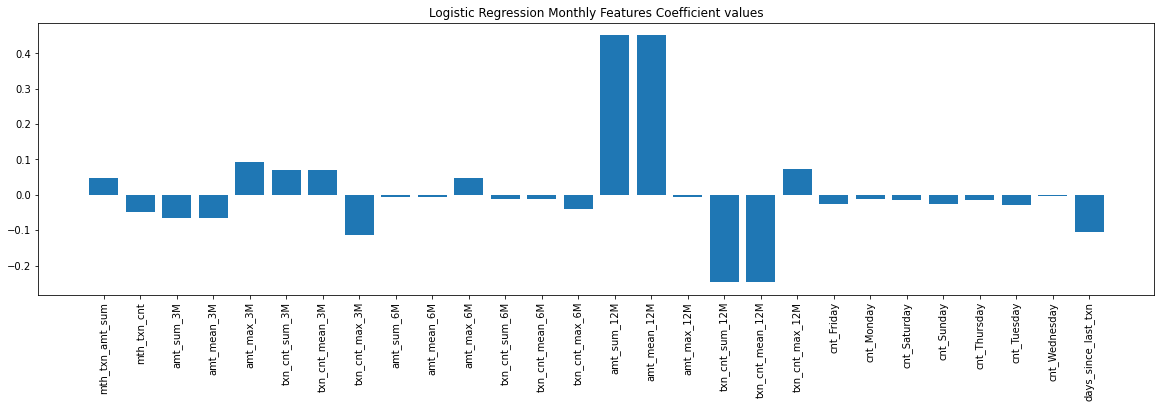

<Figure size 432x288 with 0 Axes>

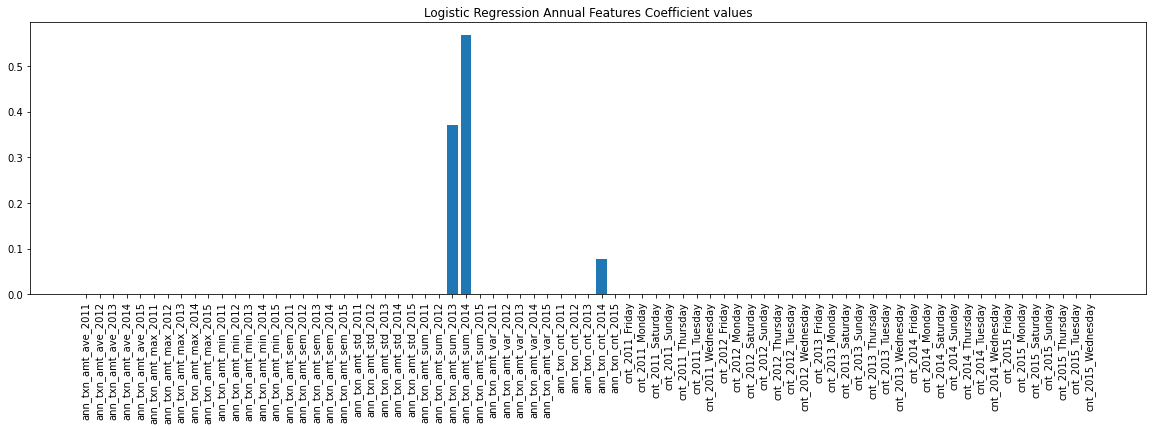

<Figure size 432x288 with 0 Axes>

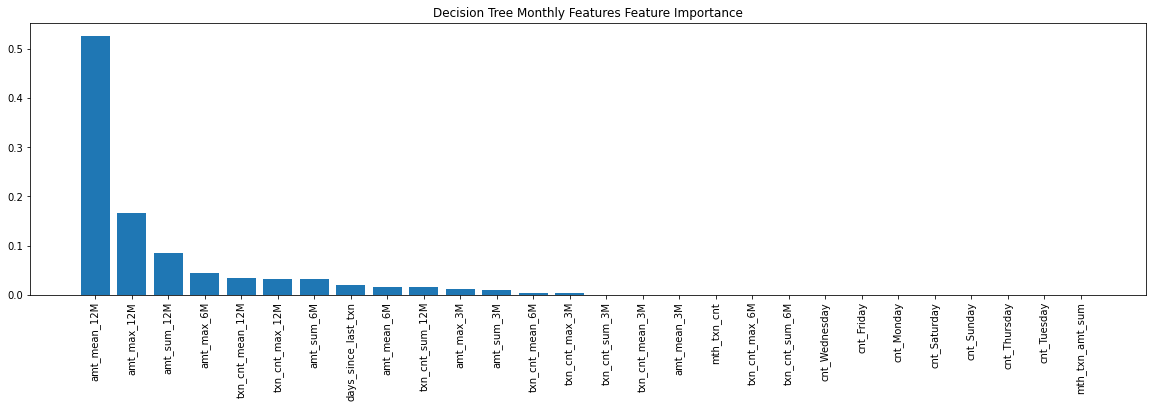

<Figure size 432x288 with 0 Axes>

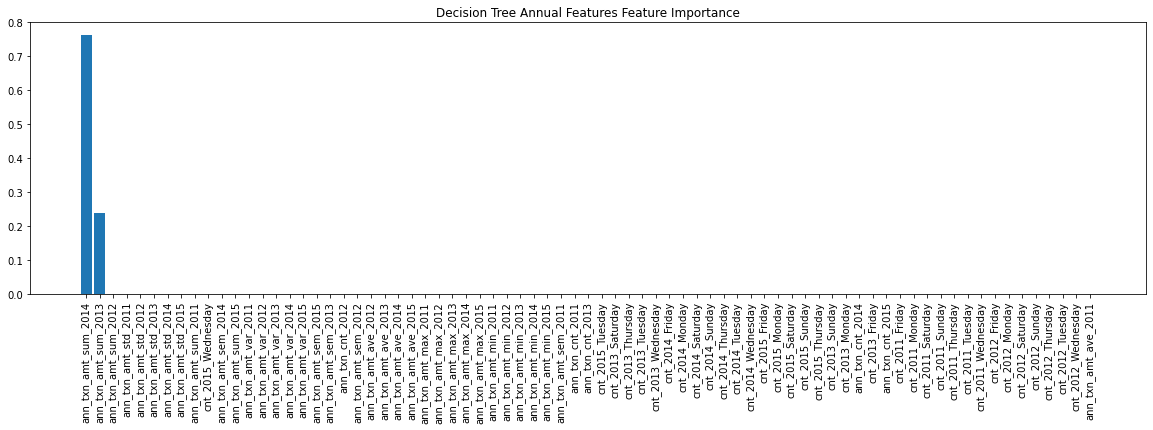

<Figure size 432x288 with 0 Axes>

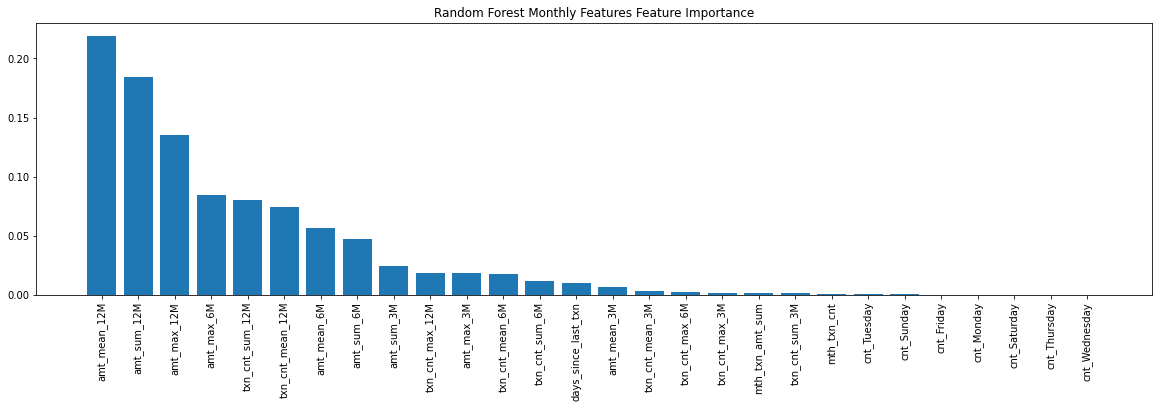

<Figure size 432x288 with 0 Axes>

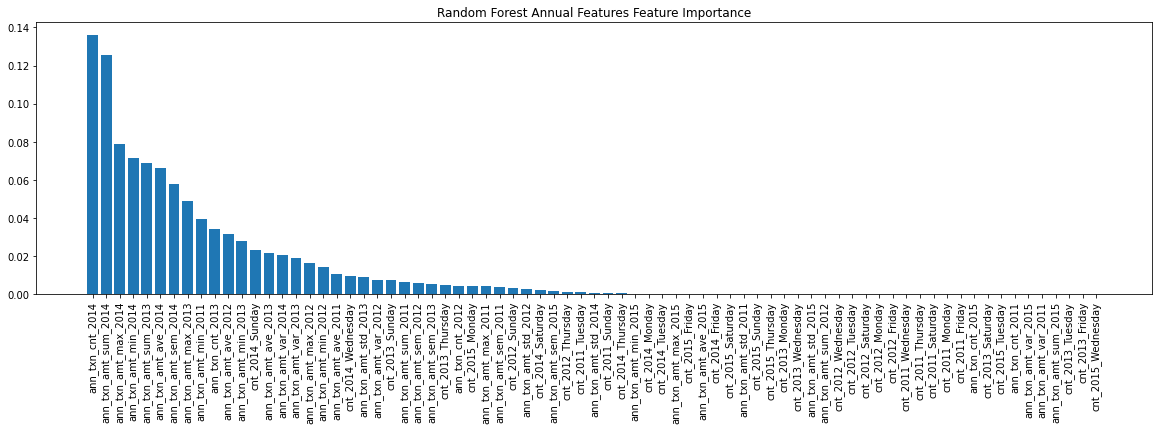

In [26]:
plot = 1
# logistic regression monthly
plotting("Logistic Regression Monthly Features", LR_monthly, monthly_features_outputs_X, pd.DataFrame(X_train_monthly_scaled,columns = monthly_features_outputs_X.columns), X_test_monthly_scaled, y_train_monthly, y_test_monthly, True, plot)
# logistic regression annual
plotting("Logistic Regression Annual Features", LR_annual, annual_features_outputs_X, pd.DataFrame(X_train_annual_scaled,columns = annual_features_outputs_X.columns), X_test_annual_scaled, y_train_annual, y_test_annual, True, plot)
# decision tree monthly
plotting("Decision Tree Monthly Features", DT_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# decision tree annual
plotting("Decision Tree Annual Features", DT_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)
# random forest monthly
plotting("Random Forest Monthly Features", RF_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# random forest annual
plotting("Random Forest Annual Features", RF_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)

### 1.2.6 Plot probability distribution for test set.

<Figure size 432x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

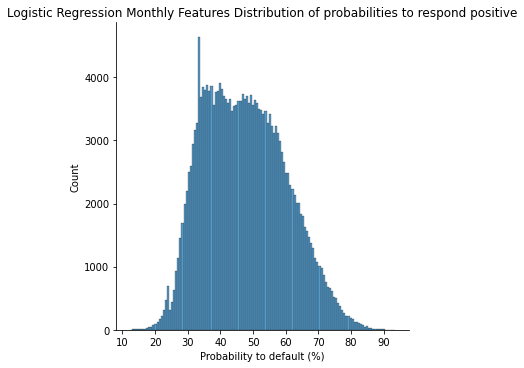

              scores
count  215699.000000
mean        0.475398
std         0.125137
min         0.121804
25%         0.374278
50%         0.467622
75%         0.565393
max         0.935702


<Figure size 432x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

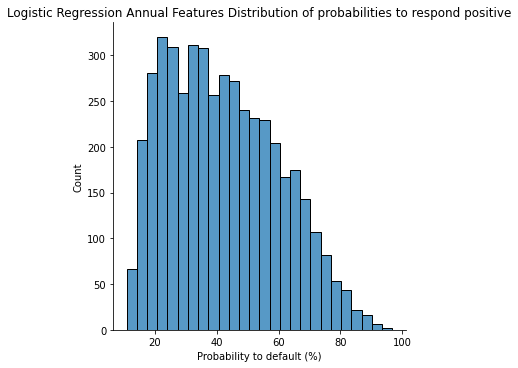

            scores
count  4590.000000
mean      0.420822
std       0.178247
min       0.108823
25%       0.271267
50%       0.403049
75%       0.549798
max       0.967319


<Figure size 432x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

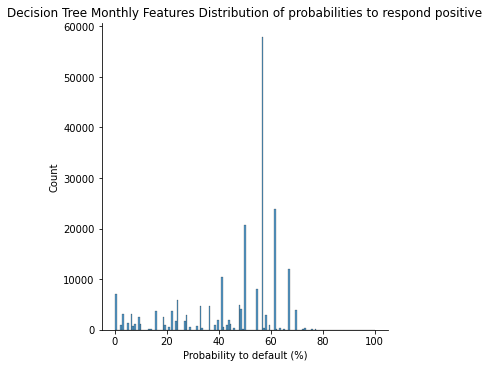

              scores
count  215699.000000
mean        0.456990
std         0.187055
min         0.000000
25%         0.362494
50%         0.550523
75%         0.566774
max         1.000000


<Figure size 432x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

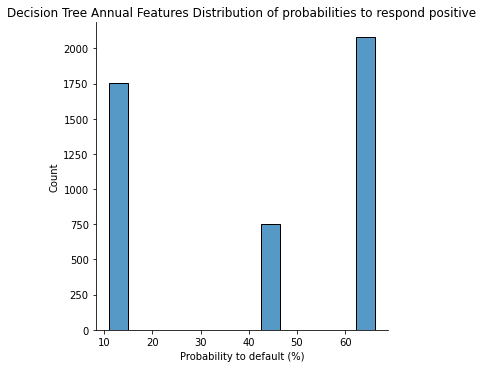

            scores
count  4590.000000
mean      0.414158
std       0.251237
min       0.110007
25%       0.110007
50%       0.440145
75%       0.661089
max       0.661089


<Figure size 432x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

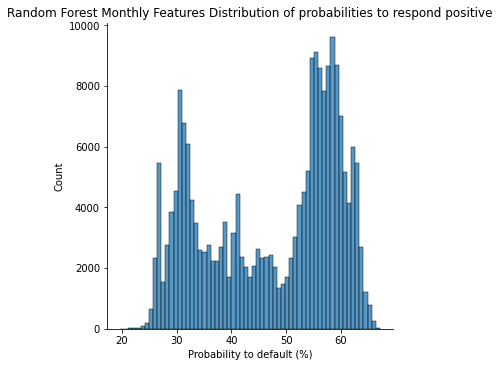

              scores
count  215699.000000
mean        0.473951
std         0.120415
min         0.196195
25%         0.351064
50%         0.520980
75%         0.578544
max         0.671557


<Figure size 432x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

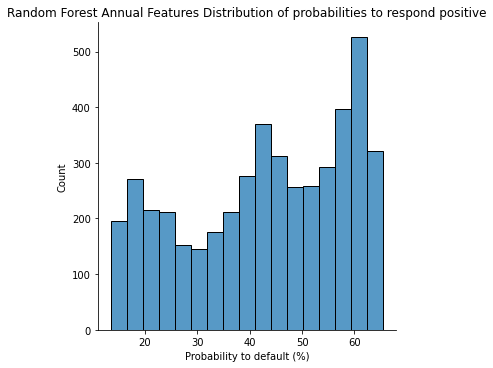

            scores
count  4590.000000
mean      0.431334
std       0.150757
min       0.135675
25%       0.309795
50%       0.447148
75%       0.570770
max       0.653988


In [27]:
plot = 2
# logistic regression monthly
plotting("Logistic Regression Monthly Features", LR_monthly, monthly_features_outputs_X, pd.DataFrame(X_train_monthly_scaled,columns = monthly_features_outputs_X.columns), X_test_monthly_scaled, y_train_monthly, y_test_monthly, True, plot)
# logistic regression annual
plotting("Logistic Regression Annual Features", LR_annual, annual_features_outputs_X, pd.DataFrame(X_train_annual_scaled,columns = annual_features_outputs_X.columns), X_test_annual_scaled, y_train_annual, y_test_annual, True, plot)
# decision tree monthly
plotting("Decision Tree Monthly Features", DT_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# decision tree annual
plotting("Decision Tree Annual Features", DT_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)
# random forest monthly
plotting("Random Forest Monthly Features", RF_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# random forest annual
plotting("Random Forest Annual Features", RF_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)

### 1.2.7 Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

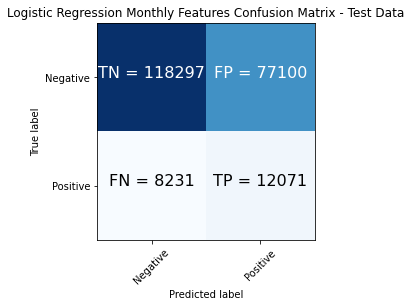

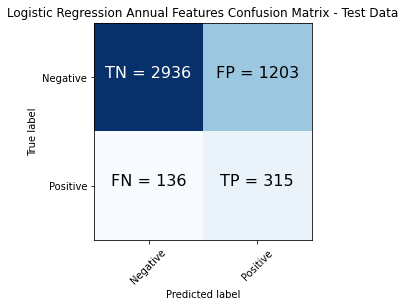

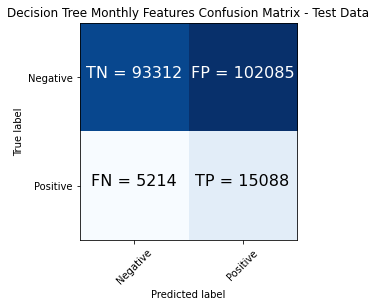

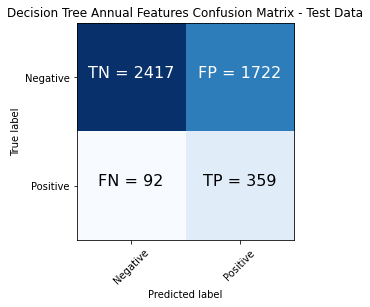

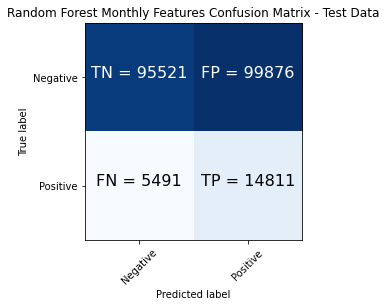

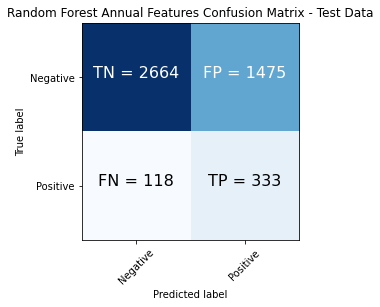

In [28]:
plot = 3
# logistic regression monthly
plotting("Logistic Regression Monthly Features", LR_monthly, monthly_features_outputs_X, pd.DataFrame(X_train_monthly_scaled,columns = monthly_features_outputs_X.columns), X_test_monthly_scaled, y_train_monthly, y_test_monthly, True, plot)
# logistic regression annual
plotting("Logistic Regression Annual Features", LR_annual, annual_features_outputs_X, pd.DataFrame(X_train_annual_scaled,columns = annual_features_outputs_X.columns), X_test_annual_scaled, y_train_annual, y_test_annual, True, plot)
# decision tree monthly
plotting("Decision Tree Monthly Features", DT_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# decision tree annual
plotting("Decision Tree Annual Features", DT_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)
# random forest monthly
plotting("Random Forest Monthly Features", RF_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# random forest annual
plotting("Random Forest Annual Features", RF_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)

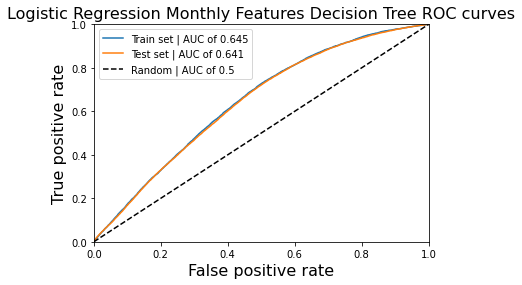

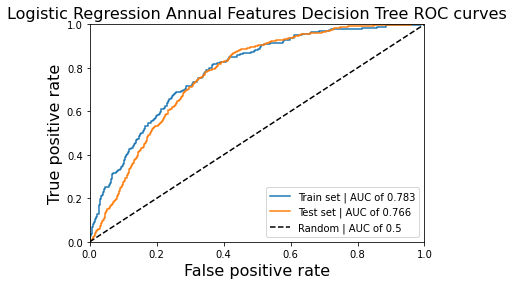

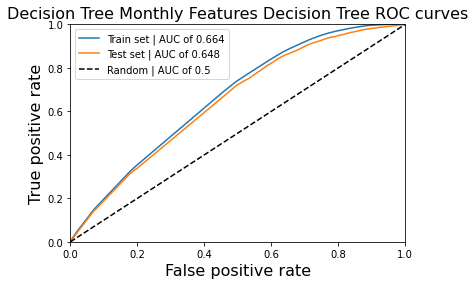

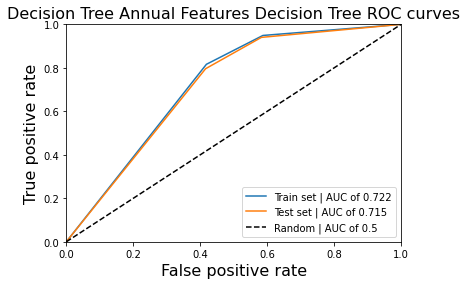

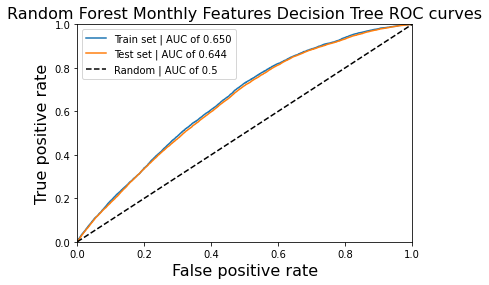

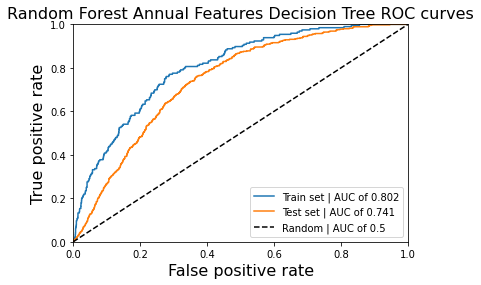

In [29]:
plot = 4
# logistic regression monthly
plotting("Logistic Regression Monthly Features", LR_monthly, monthly_features_outputs_X, pd.DataFrame(X_train_monthly_scaled,columns = monthly_features_outputs_X.columns), X_test_monthly_scaled, y_train_monthly, y_test_monthly, True, plot)
# logistic regression annual
plotting("Logistic Regression Annual Features", LR_annual, annual_features_outputs_X, pd.DataFrame(X_train_annual_scaled,columns = annual_features_outputs_X.columns), X_test_annual_scaled, y_train_annual, y_test_annual, True, plot)
# decision tree monthly
plotting("Decision Tree Monthly Features", DT_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# decision tree annual
plotting("Decision Tree Annual Features", DT_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)
# random forest monthly
plotting("Random Forest Monthly Features", RF_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# random forest annual
plotting("Random Forest Annual Features", RF_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)

In [30]:
plot = 5
# logistic regression monthly
plotting("Logistic Regression Monthly Features", LR_monthly, monthly_features_outputs_X, pd.DataFrame(X_train_monthly_scaled,columns = monthly_features_outputs_X.columns), X_test_monthly_scaled, y_train_monthly, y_test_monthly, True, plot)
# logistic regression annual
plotting("Logistic Regression Annual Features", LR_annual, annual_features_outputs_X, pd.DataFrame(X_train_annual_scaled,columns = annual_features_outputs_X.columns), X_test_annual_scaled, y_train_annual, y_test_annual, True, plot)
# decision tree monthly
plotting("Decision Tree Monthly Features", DT_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# decision tree annual
plotting("Decision Tree Annual Features", DT_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)
# random forest monthly
plotting("Random Forest Monthly Features", RF_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# random forest annual
plotting("Random Forest Annual Features", RF_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)


Logistic Regression Monthly Features
                      precision    recall  f1-score   support

responded negatively       0.93      0.61      0.73    195397
responded positively       0.14      0.59      0.22     20302

            accuracy                           0.60    215699
           macro avg       0.54      0.60      0.48    215699
        weighted avg       0.86      0.60      0.69    215699


Logistic Regression Annual Features
                      precision    recall  f1-score   support

responded negatively       0.96      0.71      0.81      4139
responded positively       0.21      0.70      0.32       451

            accuracy                           0.71      4590
           macro avg       0.58      0.70      0.57      4590
        weighted avg       0.88      0.71      0.77      4590


Decision Tree Monthly Features
                      precision    recall  f1-score   support

responded negatively       0.95      0.48      0.63    195397
responded positive

### 1.2.8 Plot decision boundary for top 2 features.

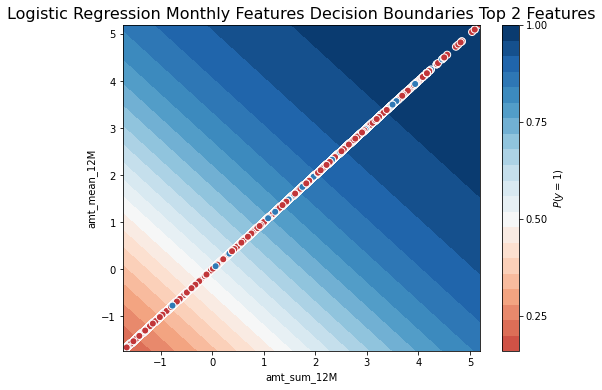

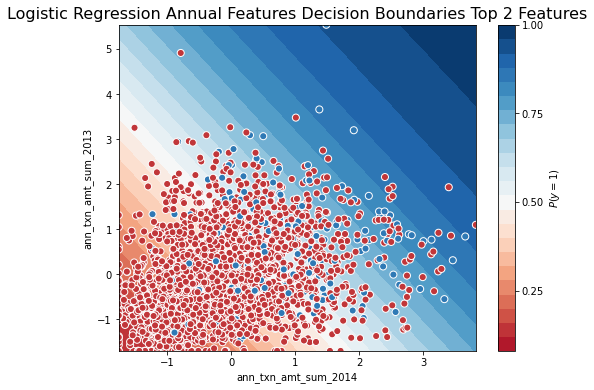

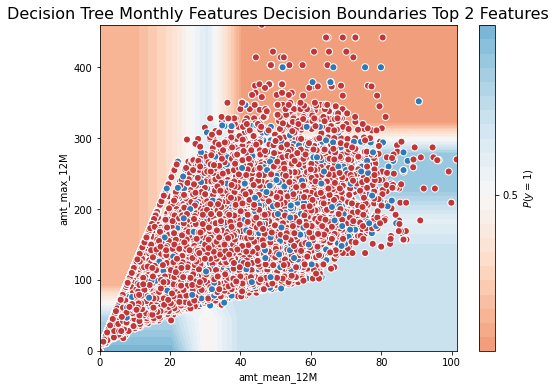

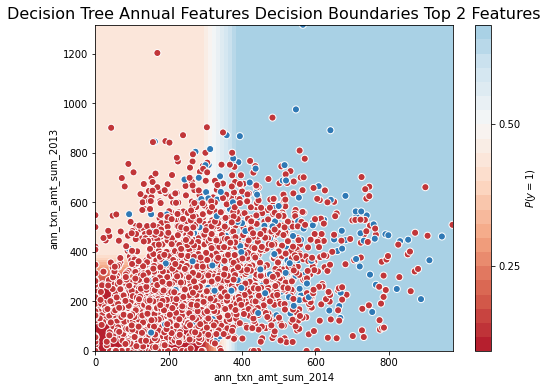

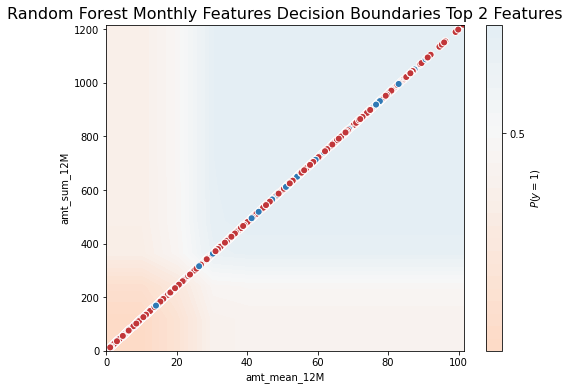

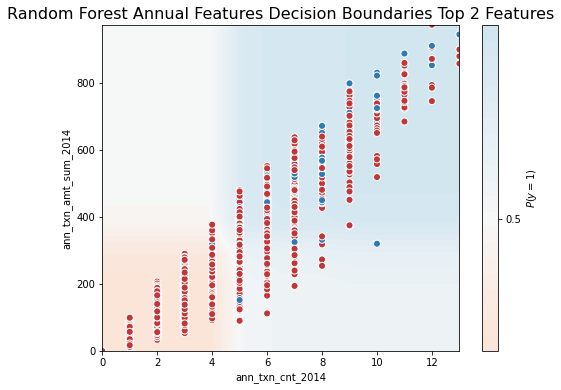

In [31]:
plot = 6
# logistic regression monthly
plotting("Logistic Regression Monthly Features", LR_monthly, monthly_features_outputs_X, pd.DataFrame(X_train_monthly_scaled,columns = monthly_features_outputs_X.columns), X_test_monthly_scaled, y_train_monthly, y_test_monthly, True, plot)
# logistic regression annual
plotting("Logistic Regression Annual Features", LR_annual, annual_features_outputs_X, pd.DataFrame(X_train_annual_scaled,columns = annual_features_outputs_X.columns), X_test_annual_scaled, y_train_annual, y_test_annual, True, plot)
# decision tree monthly
plotting("Decision Tree Monthly Features", DT_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# decision tree annual
plotting("Decision Tree Annual Features", DT_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)
# random forest monthly
plotting("Random Forest Monthly Features", RF_monthly, monthly_features_outputs_X, X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly, False, plot)
# random forest annual
plotting("Random Forest Annual Features", RF_annual, annual_features_outputs_X, X_train_annual, X_test_annual, y_train_annual, y_test_annual, False, plot)

## 1.3 Comparison of methods

**Logistic Regression Monthly Feature Model**
LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

**Logistic Regression Annual Feature Model**
LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


**Decision Tree Monthly Feature Model**
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=18, max_features=None,
                       max_leaf_nodes=100, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

**Decision Tree Annual Feature Model**
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features=None,
                       max_leaf_nodes=3, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')


**Random Forest Monthly Feature Model**
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Random Forest Annual Feature Model**
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Evaluation of the feature engineering and modeling approach is based on the context of the classification problem. The goal of this classification problem is to predict the client's response to a promotion campaign. With the application to better target the customers that will respond positively to the promotion campaign. 

No penalty/reward function was provided. Therefore, the penalty/cost associated with false positive and false negative can't be calculated; same with the reward/gain associated with true negative and true positive. A few assumptions are made:
*   Reward/gain of correctly classifying a customer that respond positively (true positive) is much higher than correctly classifying a customer that respond negatively (true negative)
*   Penalty/cost of classifying a customer that will respond positively as responding negatively (false negative) is very high.
*   Penalty/cost of classifying a customer that will respond negatively as responding positively (false positive) is very low.

Based on the assumptions above, the evaluation will set the primary evaluation metric as "recall" and the secondary evaluation metric as "precision". This was also done earlier on in the model selection stage, grid search with 5 folds cross validation used "recall" as the metric for model selection.

**Coefficient values or feature importance**

| Method | Feature | Top Feature 1 | Top Feature 2 | Top Feature 3 |
| ------------- | ------------- |-------------|-------------|-------------|
| Logistic Regression | Monthly |amt_sum_12M|amt_mean_12M|txn_cnt_sum_12M|
| Logistic Regression | Annual |ann_txn_amt_sum_2013|ann_txn_amt_sum_2014|ann_txn_cnt_2014|
| Decision Tree | Monthly |amt_mean_12M|amt_max_12M|amt_sum_12M|
| Decision Tree | Annual |ann_txn_amt_sum_2014|ann_txn_amt_sum_2013|ann_txn_amt_sum_2012|
| Random Forest | Monthly |amt_mean_12M|amt_sum_12M|amt_max_12M|
| Random Forest | Annual |ann_txn_cnt_2014|ann_txn_amt_sum_2014|ann_txn_amt_max_2014|

*   Lots of overlapping features between top features of the models that used the same type of feature data (monthly or annual) to train. Some even showed up in all 3 different type of models e.g., "amt_sum_12M"

*   Optimized logistic Regression model with monthly features had a high "c" value which significantly reduced the strength of penalizing the model. This results in large number of features that have coefficients greater or less than 0.
*   Optimized logistic Regression model with annual features had a low "c" value which increased the strength of penalizing the model. This results in only 3 features with coefficients greater or less than 0.

*   Decision tree models have top features with very high feature importance values, and fewer features with positive feature importance value compared to random forest models.

*   Random forest models have top features with relatively low feature importance values and more features with positive feature importance value compare to decision tree models. This is due to the difference between decision tree and random forest algorithm. 

**Probability distribution for test set**

| Method | Feature | mean | std | min | 25% | 50% | 75% | max |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Logistic Regression | Monthly | 0.475399 | 0.125132 | 0.121816 | 0.374281 | 0.467620 | 0.565391 | 0.935692 |
| Logistic Regression | Annual | 0.420823 | 0.178247 | 0.108824 | 0.271267 | 0.403050 | 0.549799 | 0.967318 |
| Decision Tree | Monthly | 0.456990 | 0.187055 | 0.000000 | 0.362494 | 0.550523 | 0.566774 | 1.000000 |
| Decision Tree | Annual | 0.414158 | 0.251237 | 0.110007 | 0.110007 | 0.440145 | 0.661089 | 0.661089 |
| Random Forest | Monthly | 0.473951 | 0.120415 | 0.196195 | 0.351064 | 0.520980 | 0.578544 | 0.671557 |
| Random Forest | Annual | 0.431334 | 0.150757 | 0.135675 | 0.309795 | 0.447148 | 0.570770 | 0.653988 |

*   Prediction probabilities for logistic regression are generated from a mathematical function, hence the probabilities are continuous.

*   Prediction probability for tree-based models is generated from the end nodes. The number of end nodes is associated to the number of different prediction probabilities the tree model can generate; hence the probabilities are discrete.

*   Before setting the model parameter class_weights to "balanced" and the model selection metric as "recall" the resulting probability from the models are extremely low. On the extreme case, no instance had a prediction probability greater than 50%.

*   After setting the model parameter class_weights to "balanced" and the model selection metric as "recall" the resulting probability from the models are a lot more balanced. Mean and median of the prediction probability increased to greater than 40%.

**Confusion matrix**

| Method | Feature | True Positive | True Negative | False Positive | False Negative |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Logistic Regression | Monthly |12072|118298|77099|8230|
| Logistic Regression | Annual |315|2936|1203|136|
| Decision Tree | Monthly |15088|93312|102085|5214|
| Decision Tree | Annual |359|2417|1722|92|
| Random Forest | Monthly |14811|95521|99876|5491|
| Random Forest | Annual |333|2664|1475|118|

*   Comparing the confusion matrix with the evaluation assumptions made above our focus is the maximum number of true positives and minimum number of false negatives.
*   Based on the number of true positives and false negatives, decision tree model outperforms the 2 other method for both the monthly and annual features.
*   Random forest model comes second, and logistic regression had the worst performance.

**ROC curves of train/test set**

| Method | Feature | AUC (Train set) | AUC (Test set) |
| ------------- | ------------- | ------------- | ------------- |
| Logistic Regression | Monthly |0.645|0.641|
| Logistic Regression | Annual |0.783|0.766|
| Decision Tree | Monthly |0.664|0.648|
| Decision Tree | Annual |0.722|0.715|
| Random Forest | Monthly |0.650|0.644|
| Random Forest | Annual |0.802|0.741|

*   Ranking the models based on AUC(test):
1.   Logistic Regression  Annual
2.   Random Forest  Annual  
3.   Decision Tree  Annual
4.   Decision Tree  Monthly
5.   Random Forest  Monthly
6.   Logistic Regression  Monthly

* Between the three methods logistic regression had the best performance.
* Between the two different features annual features outperformed monthly features.

**Precision and Recall**

| Method | Feature | Precision (responded negatively) | Recall (responded negatively) | Precision (responded positively) | Recall (responded positively) |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Logistic Regression | Monthly |0.93|0.61|0.14|0.59|
| Logistic Regression | Annual |0.96|0.71|0.21|0.70|
| Decision Tree | Monthly |0.95|0.48|0.13|0.74|
| Decision Tree | Annual |0.96|0.58|0.17|0.80|
| Random Forest | Monthly |0.95|0.49|0.13|0.73|
| Random Forest | Annual |0.96|0.64|0.18|0.74|

*   Comparing the classification report with the evaluation assumptions made above our focus is the maximum number of true positives and minimum number of false negatives, hence max recall.

*   Based on the recall values, decision tree model outperforms the 2 other method for both the monthly and annual features.

*   Random forest model comes second, and logistic regression had the worst performance.

*   Comparing the "recall" of annual feature model with the monthly feature models, it is clear annual features outperform monthly features.

**Decision boundary for top 2 features**

| Method | Feature |Probability Range|Segmentation|
| ------------- | ------------- | ------------- | ------------- |
| Logistic Regression | Monthly |Large|Diagonal|
| Logistic Regression | Annual |Large|Diagonal|
| Decision Tree | Monthly |Medium|Orthogonal|
| Decision Tree | Annual |Medium|Orthogonal|
| Random Forest | Monthly |Small|Orthogonal|
| Random Forest | Annual |Small|Orthogonal|

*   Random forest models had the lowest range of probabilities (around 0.5) displayed on the top two feature decision boundaries plot. While logistic regression's top two feature's decision boundary contain the full range of probabilities (0 to 1)

* Tree based model's decision boundary cuts are orthogonal, and logistic regression's decision boundary are diagonal.

The combination of feature engineering and modeling approach I would select as the best to deploy in a production environment would be "annual features" with "Decision Tree Classifier".

The reasons for selecting "annual features" with "Decision Tree Classifier" include:
*   It has the best performance for the evaluation metric selected
*   A large amount of hyperparameters that could be used to tune the model
*   Tree based methods are more flexible compared to logistic regression
*   Easy to visualize and explain 
*   Easy for non-technical personal to understand and utilize
*   Don't require scaled inputs, hence no pre-processing required
*   Can process both continuous and categorical features, if in the future categorical features are added to the feature set.

